<a href="https://colab.research.google.com/github/farhanarrafi/UNT-CS-Machine-Learning-Project/blob/ml-farhan/MachineLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks:
1. Get list of stock tickers and make a searchable API - https://github.com/rreichel3/US-Stock-Symbols

In [4]:
import os
import os.path
import json
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.pipeline import Pipeline

In [ ]:


api_token = {"username":"farhanarrafi","key":"4b636dec3bba0a0303176626ff2365e3"}


if not os.path.isdir('/root/.kaggle'):
  ! mkdir ~/.kaggle
  ! touch ~/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as file:
      json.dump(api_token, file)
  !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
## Download Global Markets Data
if not os.path.isfile('2020_Global_Markets_Data.csv'):
  ! kaggle datasets download -d 'pavankrishnanarne/global-stock-market-2008-present'
  ! unzip global-stock-market-2008-present.zip
  ! rm -rf global-stock-market-2008-present.zip
  ! rm -rf sample_data/

  0% 0.00/1.12M [00:00<?, ?B/s]
100% 1.12M/1.12M [00:00<00:00, 35.3MB/s]
Archive:  global-stock-market-2008-present.zip
  inflating: 2008_Globla_Markets_Data.csv  
  inflating: 2009_Globla_Markets_Data.csv  
  inflating: 2010_Global_Markets_Data.csv  
  inflating: 2011_Global_Markets_Data.csv  
  inflating: 2012_Global_Markets_Data.csv  
  inflating: 2013_Global_Markets_Data.csv  
  inflating: 2014_Global_Markets_Data.csv  
  inflating: 2015_Global_Markets_Data.csv  
  inflating: 2016_Global_Markets_Data.csv  
  inflating: 2017_Global_Markets_Data.csv  
  inflating: 2018_Global_Markets_Data.csv  
  inflating: 2019_Global_Markets_Data.csv  
  inflating: 2020_Global_Markets_Data.csv  
  inflating: 2021_Global_Markets_Data.csv  
  inflating: 2022_Global_Markets_Data.csv  
  inflating: 2023_Global_Markets_Data.csv  


In [ ]:

dataset_global_market_2020 = pd.read_csv('2020_Global_Markets_Data.csv')
#dataset_global_market_2021 = pd.read_csv('2021_Global_Markets_Data.csv')
#dataset_global_market_2022 = pd.read_csv('2022_Global_Markets_Data.csv')
#dataset_global_market_2023 = pd.read_csv('2023_Global_Markets_Data.csv')

if os.path.isfile('2023_Global_Markets_Data.csv'):
  ! rm -rf 2008_Globla_Markets_Data.csv
  ! rm -rf 2009_Globla_Markets_Data.csv
  ! rm -rf 2010_Global_Markets_Data.csv
  ! rm -rf 2011_Global_Markets_Data.csv
  ! rm -rf 2012_Global_Markets_Data.csv
  ! rm -rf 2013_Global_Markets_Data.csv
  ! rm -rf 2014_Global_Markets_Data.csv
  ! rm -rf 2015_Global_Markets_Data.csv
  ! rm -rf 2016_Global_Markets_Data.csv
  ! rm -rf 2017_Global_Markets_Data.csv
  ! rm -rf 2018_Global_Markets_Data.csv
  ! rm -rf 2019_Global_Markets_Data.csv
  ! rm -rf 2021_Global_Markets_Data.csv
  ! rm -rf 2022_Global_Markets_Data.csv
  ! rm -rf 2023_Global_Markets_Data.csv

In [ ]:
dataset_global_market_2020.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,^NSEI,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,3.041000e+05
1,^NYA,2020-01-02,13913.030273,14003.389648,13913.030273,14002.490234,14002.490234,3.459930e+09
2,^IXIC,2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,2.862700e+09
3,^FTSE,2020-01-02,7542.399902,7624.799805,7542.399902,7604.299805,7604.299805,4.822067e+08
4,^NSEI,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,4.077000e+05


In [ ]:
dataset_global_market_2020.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000,3.012000e+03
mean,11354.587633,11439.352700,11252.197290,11348.668147,11348.668147,1.307467e+09
std,11563.068508,11637.405991,11464.593780,11553.301603,11553.301603,2.053077e+09
min,-14.000000,13.690000,-40.320000,-37.630001,-37.630001,0.000000e+00
25%,1969.325012,1983.500031,1954.950012,1965.649994,1965.649994,3.127500e+05
50%,7506.250000,7582.750000,7462.205078,7503.589844,7503.589844,1.595500e+08
75%,14405.485107,14446.489746,14317.044678,14399.507568,14399.507568,2.248452e+09
max,47789.031250,47896.968750,47602.121094,47751.328125,47751.328125,9.053950e+09


In [ ]:
dataset_global_market_2020['Ticker'].unique()

array(['^NSEI', '^NYA', '^IXIC', '^FTSE', '^BSESN', '000001.SS', '^N100',
       '^DJI', '^GSPC', 'GC=F', 'CL=F', '^N225'], dtype=object)

In [ ]:
## Download Stock Market TWEETS

def download_Tweets():
  if not os.path.isfile('Labelled Tweets.csv'):
    ! kaggle datasets download -d 'dawoodaijaz/stock-market-tweets-labelled-with-gcp-nlp'
    ! unzip stock-market-tweets-labelled-with-gcp-nlp.zip
    ! rm -rf stock-market-tweets-labelled-with-gcp-nlp.zip


In [ ]:
# dataset_stock_tweets = pd.read_csv('Labelled Tweets.csv')

In [ ]:
#dataset_stock_tweets.head()

In [ ]:
#dataset_stock_tweets.describe()

In [ ]:
## Download Stock Market Data (NASDAQ, NYSE, S&P500)
## kaggle datasets download -d paultimothymooney/stock-market-data
if not os.path.isfile('stock-market-data'):
  ! kaggle datasets download --unzip -q -o 'paultimothymooney/stock-market-data'

## Data Pre-Processing

https://www.kaggle.com/code/alirezahasannejad/data-preprocessing-in-machine-learning

### Python iterate through files in direcotry: https://stackoverflow.com/a/10378012


In [ ]:




def getStockFileList():
    stock_sp500_list = []
    directory = os.fsencode('stock_market_data/sp500/csv')
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".csv"):
            stock_sp500_list.append(filename)
    stock_sp500_list.sort()
    return stock_sp500_list

def getStockNameList():
    stock_sp500_list = []
    directory = os.fsencode('stock_market_data/sp500/csv')
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".csv"):
            stock_sp500_list.append(filename.removesuffix(".csv"))
    stock_sp500_list.sort()
    return stock_sp500_list

stock_sp500_list = getStockFileList()
#dataset_stock_sp500_AAPL = pd.read_csv('stock_market_data/sp500/csv/AAPL.csv')

In [ ]:
# Get Stock as Dataframe
def getStockDataFrame(stock_file='', start='2020', end='2020'):
     dataframe = pd.read_csv(f'stock_market_data/sp500/csv/{stock_file}')
     dataframe.dropna(inplace=True)
     dataframe.reset_index(drop=True,inplace=True)
     dataframe['Date']= pd.to_datetime(dataframe['Date'])
     dataframe = dataframe.loc[(dataframe['Date'].dt.strftime('%Y') >= start) & (dataframe['Date'].dt.strftime('%Y') <= end)]
     return dataframe

def getStockDataFrameForYear(stock_file='', year='2020'):
     dataframe = pd.read_csv(f'stock_market_data/sp500/csv/{stock_file}')
     dataframe.dropna(inplace=True)
     dataframe.reset_index(drop=True,inplace=True)
     dataframe['Date']= pd.to_datetime(dataframe['Date'])
     dataframe = dataframe.loc[dataframe['Date'].dt.strftime('%Y') == year]
     return dataframe

df_sp500_1stock = getStockDataFrame(stock_file=stock_sp500_list[1], start='2012', end='2022')

<ipython-input-15-f7a830856cef>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe['Date']= pd.to_datetime(dataframe['Date'])


In [ ]:
df_sp500_1stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 1578 to 4332
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2755 non-null   datetime64[ns]
 1   Low             2755 non-null   float64       
 2   Open            2755 non-null   float64       
 3   Volume          2755 non-null   int64         
 4   High            2755 non-null   float64       
 5   Close           2755 non-null   float64       
 6   Adjusted Close  2755 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 172.2 KB


In [ ]:
df_sp500_1stock.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [ ]:
df_sp500_1stock.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
1578,2012-03-01,5.07,5.20,6105900,5.22,5.12,4.826837
1579,2012-04-01,4.97,5.09,5268700,5.18,5.03,4.741989
1580,2012-05-01,5.07,5.15,8216100,5.48,5.47,5.156796
1581,2012-06-01,5.40,5.44,8323000,5.67,5.60,5.279352
1582,2012-09-01,5.55,5.56,8029900,5.80,5.72,5.392481


In [ ]:
df_sp500_1stock.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
4328,2022-06-12,14.00,14.14,20781500,14.34,14.33,14.33
4329,2022-07-12,13.53,14.24,28161400,14.24,13.55,13.55
4330,2022-08-12,13.38,13.65,25300900,13.80,13.60,13.60
4331,2022-09-12,13.42,13.52,18489800,13.66,13.53,13.53
4332,2022-12-12,13.45,13.49,6824831,13.91,13.90,13.90


# Value at Risk (VaR) Method
Suppose $500,000 is invested in stock ABC. The standard deviation over 252 days, or one trading year, of stock ABC, is 7%. Following the normal distribution, the one-sided 95% confidence level has a z-score of 1.645.

The value at risk in this portfolio is

$57,575 = ($500,000 * 1.645 * .07).
Therefore, with 95% confidence, the maximum loss will not exceed $57,575 in a given trading year.

In [ ]:
from scipy import stats

def getValueAtRisk(stockDF, confidence=.95, investment=100):
    std_closing = stockDF['Close'].std()
    zscore = stats.norm.ppf(confidence)
    # Considering someone invested $1000, the maximum loss will not exceed:
    max_loss = investment * zscore * (std_closing/100)
    return max_loss

def getNormalizedValueAtRisk(stockDF, confidence=.95, investment=100):
    return getValueAtRisk(stockDF, confidence=confidence, investment=investment)/100

getValueAtRisk(df_sp500_1stock, .95, 100)

22.662424630076288

In [ ]:

def getDataframeForYear(df, year):
    return df.loc[df['Date'].dt.strftime('%Y') == str(year)]

stock_sp500_list = getStockFileList()

##print(len(stock_sp500_list))

start_year = 2012
end_year = 2022


def getValueAtRiskForStocks(stock_sp500_list, start_year, end_year):
    stock_count = len(stock_sp500_list)
    year_count = end_year - start_year
    dataArray_i = stock_count
    dataArray_j = end_year - start_year
    dataArray = np.zeros(shape=(dataArray_i, dataArray_j))
    #print(dataArray)
    i = 0;
    for stockFile in stock_sp500_list:
        stockDF = getStockDataFrame(stock_file=stockFile, start=str(start_year), end=str(end_year))
        j = 0;
        for yr in range(start_year, end_year):
            stockDF_1yr = getDataframeForYear(stockDF, yr)
            #print(stockDF_1yr.shape)
            var = getValueAtRisk(stockDF_1yr,  .95, 100)
            #print(j)
            dataArray[i,j] = var
            j = j + 1
        i = i + 1

    stock_sp500_Namelist = getStockNameList()
    stock_DF_VAR = pd.DataFrame(data = dataArray, index = stock_sp500_Namelist, columns=range(start_year, end_year))
    stock_DF_VAR.fillna(0, inplace=True)
    stock_DF_VAR.to_csv(f"stock_sp500_VAR_list_{start_year}_{end_year}.csv", sep=',', encoding='utf-8')

    return stock_DF_VAR

In [ ]:
stock_DF_VAR = getValueAtRiskForStocks(stock_sp500_list, start_year, end_year)

<ipython-input-15-f7a830856cef>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe['Date']= pd.to_datetime(dataframe['Date'])


## Keltner Channels

[Keltner Channels Investopedia](https://www.investopedia.com/terms/k/keltnerchannel.asp)

## Kurtosis
https://www.investopedia.com/terms/k/kurtosis.asp

A high kurtosis value for daily returns may indicate frequent fluctuations in price that deviate significantly from the average returns of that investment, which can lead to increased volatility and risk associated with the stock.

High levels of kurtosis indicate a high concentration of observations in the tails of their daily returns distributions, which suggests that stocks with high kurtosis are subject to high levels of volatility and risk, with considerate price fluctuations that deviate significantly from their average returns.

In [ ]:
from scipy.stats import kurtosis

kurt_aapl_2022 = kurtosis(df_sp500_1stock['Close'])

kurt_aapl_2022

-1.3375474093662465

In [ ]:
def getKurtosisForStocks(stock_sp500_list, start_year, end_year):
    stock_count = len(stock_sp500_list)
    year_count = end_year - start_year
    dataArray_i = stock_count
    dataArray_j = end_year - start_year
    dataArray = np.zeros(shape=(dataArray_i, dataArray_j))
    #print(dataArray)
    i = 0;
    for stockFile in stock_sp500_list:
        stockDF = getStockDataFrame(stock_file=stockFile, start=str(start_year), end=str(end_year))
        j = 0;
        for yr in range(start_year, end_year):
            stockDF_1yr = getDataframeForYear(stockDF, yr)
            #print(stockDF_1yr.shape)
            kurt = kurtosis(stockDF_1yr['Close'])
            #print(j)
            dataArray[i,j] = kurt
            j = j + 1
        i = i + 1

    stock_sp500_Namelist = getStockNameList()
    stock_DF_KURT = pd.DataFrame(data = dataArray, index = stock_sp500_Namelist, columns=range(start_year, end_year))
    stock_DF_KURT.fillna(0, inplace=True)
    stock_DF_KURT.to_csv(f"stock_sp500_KURT_list_{start_year}_{end_year}.csv", sep=',', encoding='utf-8')

    return stock_DF_KURT

In [ ]:
stock_sp500_list = getStockFileList()

start_year = 2012
end_year = 2022

stock_DF_KURT = getKurtosisForStocks(stock_sp500_list, start_year, end_year)

In [ ]:
stock_DF_KURT

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
A,-0.927210,-0.520652,-0.074850,-0.510614,-0.973583,-1.216535,-0.634484,-0.760192,-0.728646,-1.039705
AAL,-0.759653,-0.145015,0.405087,-0.778330,-0.244954,-0.700476,-0.864496,-0.950206,0.864605,-0.411867
AAP,-0.893781,0.455005,0.265241,-0.297601,-0.815314,-1.423133,-1.489739,0.882264,1.565491,-0.632838
AAPL,0.062522,-0.778898,-1.138806,-1.226869,-1.291168,-0.258794,-0.925985,-0.302246,-1.401041,0.143717
ABBV,0.000000,-0.415776,0.117283,-0.911551,-0.585452,-1.199603,0.127577,-0.739313,0.191141,1.749591
...,...,...,...,...,...,...,...,...,...,...
XYL,-0.872015,0.315819,0.268507,0.174959,-0.967807,-1.449247,-0.832098,0.424700,-1.006991,-1.083024
YUM,-0.718425,-0.593156,-0.067803,-1.196764,-0.146052,-1.122117,-0.971277,-1.218573,1.002368,-0.983138
ZBH,0.681294,-0.814035,-0.653169,-1.171196,-1.448230,0.238685,-0.588877,-0.677276,0.353547,-0.096837
ZION,-0.768758,-1.012281,0.483182,-0.574173,0.588553,-0.005047,1.650991,-0.931258,-0.353707,-0.569027


https://www.kaggle.com/code/kratisaxena/stock-market-technical-indicators-visualization

## Average True Range (ATR)

[Average True Range - Investopedia](https://www.investopedia.com/terms/a/atr.asp)

Higher ATR -> Higher Volatility
Lower ATR -> Lower Volatility



In [ ]:
def getDataFrameWithATR(stockDF):
    # High - Low
    stockDF['HL'] = stockDF['High']-stockDF['Low']
    # High - Yesterdays closing price
    stockDF['HCp'] = np.abs(stockDF['High']-stockDF['Close'].shift(1))
    # Mean replace 1st NaN with mean of all values
    #df_sp500_1stock.at[0, 'HCp'] = df_sp500_1stock.loc[ : ,'HCp'].mean()
    #df_sp500_1stock.loc[df_sp500_1stock.HCp== np.NaN] = df_sp500_1stock.loc[ : ,'HCp'].mean()
    # Low - Yesterdays closing price
    stockDF['LCp'] = np.abs(stockDF['Low']-stockDF['Close'].shift(1))
    # Mean replace 1st NaN with mean of all values
    #df_sp500_1stock.at[0, 'LCp'] = df_sp500_1stock.loc[ : ,'LCp'].mean()
    #df_sp500_1stock.loc[df_sp500_1stock.LCp== np.NaN] = df_sp500_1stock.loc[ : ,'LCp'].mean()
    # True Range Calulation
    stockDF['TR'] = np.max(stockDF[['HL','HCp','LCp']], axis=1)
    # Average True Range
    stockDF['ATR'] = stockDF['TR'].rolling(14).mean()
    # Fill nulls with 0
    stockDF.fillna(0, inplace = True)
    # Drop last row
    # https://stackoverflow.com/a/46675453
    stockDF.drop(stockDF.tail(1).index, inplace=True)
    return stockDF

In [ ]:
def getNormalizedATR(stockDF):
    stockDFwithATR = getDataFrameWithATR(stockDF)
    # Normalized Average True Range
    stockDFwithATR['NATR'] = stockDFwithATR['ATR'] / stockDFwithATR['Close'] * 100
    return stockDFwithATR

In [ ]:
df_sp500_1stock_ATR = getDataFrameWithATR(df_sp500_1stock)

In [ ]:
df_sp500_1stock_NATR = getNormalizedATR(df_sp500_1stock_ATR)

In [ ]:
df_sp500_1stock.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close,HL,HCp,LCp,TR,ATR,NATR
4326,2022-02-12,13.67,13.82,24094600,13.98,13.97,13.97,0.309999,0.00,0.309999,0.309999,0.522857,3.742713
4327,2022-05-12,13.82,13.84,27029000,14.34,14.11,14.11,0.520000,0.37,0.150001,0.520000,0.525714,3.725827
4328,2022-06-12,14.00,14.14,20781500,14.34,14.33,14.33,0.340000,0.23,0.110000,0.340000,0.503571,3.514105
4329,2022-07-12,13.53,14.24,28161400,14.24,13.55,13.55,0.710000,0.09,0.800000,0.800000,0.517857,3.821823
4330,2022-08-12,13.38,13.65,25300900,13.80,13.60,13.60,0.420000,0.25,0.170000,0.420000,0.518571,3.813025


In [ ]:
df_sp500_1stock.ATR.describe()

count    2753.000000
mean        1.062129
std         0.429719
min         0.000000
25%         0.733571
50%         1.020714
75%         1.319285
max         2.852143
Name: ATR, dtype: float64

In [ ]:
df_sp500_1stock.ATR.mean() - df_sp500_1stock.ATR.std()

0.6324097753811395

<Axes: >

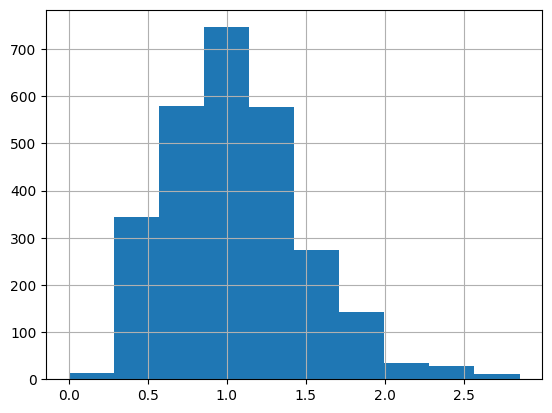

In [ ]:
df_sp500_1stock.ATR.hist()

# Data generation

In [ ]:
stock_DF_VAR = pd.read_csv('stock_sp500_VAR_list_2012_2022.csv')

In [ ]:
stock_DF_VAR.head()

,Unnamed: 0,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,A,3.178812,5.248809,2.142514,3.939642,5.918519,10.965784,5.168491,8.068420,22.540125,27.336544
1,AAL,3.733328,5.495572,8.778186,7.373617,8.299820,5.206093,12.149626,4.923387,9.373677,3.877184
2,AAP,13.025876,16.130673,19.464100,24.404243,15.773101,47.436454,39.166191,14.601005,30.541111,38.416299
3,AAPL,3.934542,2.636923,5.498455,3.159579,3.141976,6.012430,8.468472,14.202891,35.873952,24.112863
4,ABBV,0.000000,7.642804,9.314100,8.255508,5.902085,20.887019,15.641152,11.676429,13.800357,10.942417


In [ ]:
def getStockDFwithVAR(year):
    stock_count = len(stock_sp500_list)

    dataArray = []
    #print(dataArray)
    i = 0;
    for stockFile in stock_sp500_list:
        stockDF_1yr = getStockDataFrameForYear(stock_file=stock_sp500_list[i], year=str(year)).drop(columns='Date')
        stockDF_1yr_std = np.var(stockDF_1yr, axis =0)
        stock_array = np.append(stockDF_1yr_std.values, stock_DF_VAR.iloc[i][str(year)])
        dataArray = np.append(dataArray, stock_array)
        i = i+1

    dataArray = dataArray.reshape(stock_count, 7)

    stock_sp500_Namelist = getStockNameList()
    stock_DF_with_VAR = pd.DataFrame(data = dataArray, index = stock_sp500_Namelist, columns=['Low','Open','Volume','High','Close', 'Adjusted Close','VAR'])
    stock_DF_with_VAR.fillna(0, inplace=True)
    return stock_DF_with_VAR


In [ ]:
def getStockDFwithNormalizedVAR(stockDF):
    # Normalized Average True Range
    stockDF['NVAR'] = stockDF['VAR'] / stockDF['Close'] * 100
    return stockDF

In [2]:
selected_year = 2021

In [ ]:
stock_DF_with_VAR = getStockDFwithVAR(selected_year)

In [ ]:
stock_DF_with_Normalized_VAR = getStockDFwithNormalizedVAR(stock_DF_with_VAR)

In [ ]:
stock_DF_with_Normalized_VAR.describe()

,Low,Open,Volume,High,Close,Adjusted Close,VAR,NVAR
count,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,409.000000,403.000000
mean,1.926794e+06,1.968337e+06,4.162858e+13,1.953571e+06,1.925488e+06,1.925490e+06,138.373476,849.794996
std,3.894620e+07,3.978616e+07,4.170845e+14,3.948761e+07,3.891962e+07,3.891962e+07,2285.579232,9852.117553
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.005875
25%,1.311042e+01,1.316257e+01,1.306381e+11,1.284269e+01,1.331767e+01,1.351369e+01,6.014573,10.110035
50%,5.733723e+01,5.693738e+01,6.318115e+11,5.681148e+01,5.703101e+01,5.966675e+01,12.446470,20.863304
75%,2.573476e+02,2.580781e+02,3.534156e+12,2.581841e+02,2.542739e+02,2.626349e+02,26.280980,43.529044
max,7.876392e+08,8.046263e+08,8.111949e+15,7.985885e+08,7.871017e+08,7.871017e+08,46238.749819,175823.703671


In [ ]:
outliers = stock_DF_with_Normalized_VAR[(stock_DF_with_Normalized_VAR['VAR'] > 180)]

In [ ]:
stock_DF_with_Normalized_VAR.drop(outliers.index, inplace=True)

In [ ]:
stock_DF_with_Normalized_VAR.describe()

,Low,Open,Volume,High,Close,Adjusted Close,VAR,NVAR
count,405.000000,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,399.000000
mean,436.275503,442.757146,4.203968e+13,446.216728,442.888289,444.896481,22.229039,858.309340
std,1126.657986,1147.442026,4.191236e+14,1158.765276,1145.537346,1147.218422,26.658056,9901.132155
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.723350
25%,13.050652,12.972058,1.352335e+11,12.449459,12.832430,13.492037,5.903983,10.345850
50%,56.363114,56.168043,6.467174e+11,56.283391,56.040685,59.016919,12.337932,21.705362
75%,246.304676,247.062301,3.613942e+12,250.572587,252.561309,247.885451,26.192327,44.113614
max,8940.334322,9218.771907,8.111949e+15,9373.757943,9146.069777,9133.048679,157.618765,175823.703671


In [ ]:
stock_DF_with_Normalized_VAR.to_csv(f"sp500_data_{selected_year}_with_VAR_NVAR.csv", sep=',', encoding='utf-8')

In [6]:
stock_DF_with_Normalized_VAR = pd.read_csv(f'sp500_data_{selected_year}_with_VAR_NVAR.csv')

### Data Generation with Kurtosis

#### Train Test Split

In [7]:
def splitTrainTestNormalizedVAR(stockDF, train=90, target='VAR'):
    # Find number of train test and validation samples
    n_train = int(np.floor(stockDF.shape[0] * train/100))

    X_train = stockDF.iloc[ : n_train, :][['Low','Open','High', 'Close', 'Volume']]
    Y_train = stockDF.iloc[ : n_train, :][[target]]

    X_test = stockDF.iloc[n_train : , :][['Low','Open','High', 'Close', 'Volume']]
    Y_test = stockDF.iloc[n_train : , :][[target]]

    return X_train, Y_train, X_test, Y_test


def splitTrainTestValidationNormalizedVAR(stockDF, train=80,test=10,target='VAR'):
    # Find number of train test and validation samples
    n_train = int(np.floor(df_sp500_1stock.shape[0] * train/100))
    n_test = int(np.floor(df_sp500_1stock.shape[0] * test/100))

    X_train = stockDF.iloc[ : n_train, :][['Low','Open','High', 'Close', 'Volume']]
    Y_train = stockDF.iloc[ : n_train, :][[target]]

    X_test = df_sp500_1stock.iloc[n_train : (n_train+n_test), :][['Low','Open','High', 'Close', 'Volume']]
    Y_test = df_sp500_1stock.iloc[n_train : (n_train+n_test), :][[target]]

    X_valid = df_sp500_1stock.iloc[(n_train+n_test) : , :][['Low','Open','High', 'Close', 'Volume']]
    Y_valid = df_sp500_1stock.iloc[(n_train+n_test) : , :][[target]]

    return X_train, Y_train, X_test, Y_test, X_valid, Y_valid

In [10]:
X_train, Y_train, X_test, Y_test = splitTrainTestNormalizedVAR(stock_DF_with_Normalized_VAR, train=90, target='VAR')

In [11]:
# Encode to TrueFalse
def encodeTarget(boundary, targetDF, target='VAR'):
    return targetDF[target].apply(lambda x: True if x<=boundary else False)

# Decision boundary for risky and non risky price
# boundary = stock_DF.ATR.mean() - stock_DF.ATR.std() # ATR boundary
boundary = 30
Y_train_binomial = encodeTarget(boundary, Y_train, target='VAR')
Y_test_binomial = encodeTarget(boundary, Y_test, target='VAR')

In [12]:
Y_train_binomial = Y_train_binomial.values.reshape(-1,)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the data
X_train_scaled = scaler.transform(X_train)

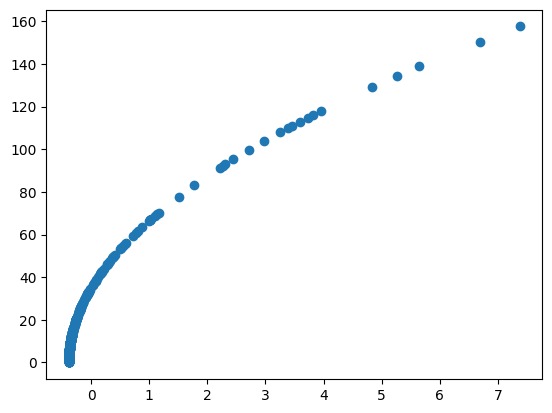

In [14]:
plt.scatter(X_train_scaled[:,3], Y_train)

In [15]:
# Gaussian Naive Bayes
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(X_train_scaled, Y_train_binomial)



GaussianNB()

In [16]:
# Fit the scaler to the data
scaler.fit(X_test)

# Transform the data
X_test_scaled = scaler.transform(X_test)

prediction = gaussian.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

classification_accuracy = accuracy_score(Y_test_binomial, prediction)
print(f"GaussianNB Classification Accuracy: {classification_accuracy}")

train_accuracy = gaussian.score(X_train_scaled,Y_train_binomial)
print(f"GaussianNB Training Accuracy: {train_accuracy}")

test_accuracy = gaussian.score(X_test_scaled,Y_test_binomial)
print(f"GaussianNB Test Accuracy: {test_accuracy}")

f1score = f1_score(Y_test_binomial, prediction)
print(f"GaussianNB F1 score: {f1score}")

precision = precision_score(Y_test_binomial, prediction)
print(f"GaussianNB Precision: {precision}")

recall = recall_score(Y_test_binomial, prediction)
print(f"GaussianNB Recall: {recall}")

mcc = matthews_corrcoef(Y_test_binomial, prediction)
print(f"GaussianNB mcc: {mcc}")

GaussianNB Classification Accuracy: 0.5853658536585366
GaussianNB Training Accuracy: 0.9835164835164835
GaussianNB Test Accuracy: 0.8780487804878049
GaussianNB F1 score: 0.6666666666666666
GaussianNB Precision: 1.0
GaussianNB Recall: 0.5
GaussianNB mcc: 0.38188130791298663


In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test_binomial, prediction)

0.8780487804878049

In [19]:
# Complement Naive Bayes
# https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes
from sklearn.naive_bayes import ComplementNB

complement_naive_bayes = ComplementNB()

complement_naive_bayes.fit(X_train, Y_train_binomial)

ComplementNB()

In [20]:
prediction = complement_naive_bayes.predict(X_test)



In [21]:
from sklearn.metrics import accuracy_score, f1_score

classification_accuracy = accuracy_score(Y_test_binomial, prediction)
print(f"Classification Accuracy: {classification_accuracy}")

train_accuracy = complement_naive_bayes.score(X_train_scaled,Y_train_binomial)
print(f"Training Accuracy: {train_accuracy}")

test_accuracy = complement_naive_bayes.score(X_test_scaled,Y_test_binomial)
print(f"Test Accuracy: {test_accuracy}")

Classification Accuracy: 0.5853658536585366
Training Accuracy: 0.9560439560439561
Test Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


In [22]:
# Gradient Boosting for classification
from sklearn.ensemble import GradientBoostingClassifier

gradBoostingClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, Y_train_binomial)

train_score = gradBoostingClassifier.score(X_train_scaled, Y_train_binomial)
test_score = gradBoostingClassifier.score(X_test_scaled, Y_test_binomial)

print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")

Training Accuracy: 0.7802197802197802
Testing Accuracy: 0.8292682926829268


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [23]:
# Fear & Greed Index

